<a href="https://colab.research.google.com/github/jeff-ai-ml/genai-langgraph/blob/main/Exercise_5_Guess_Number_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 13.1 MB/s eta 0:00:00


In [22]:
from typing import TypedDict, List , Dict
import random
from langgraph.graph import StateGraph,START, END

In [23]:
class AgentState(TypedDict):
  player_name : str
  guesses : List[int]
  attempts : int
  lower_bound : int
  upper_bound : int
  counter : int
  input_number : int
  guess_number : int


In [25]:
def setup_node(state:AgentState) -> AgentState:
  """Setup All the parameters in this node"""
  state['input_number'] = 13
  state['attempts'] = 7
  state['lower_bound'] = 1
  state['upper_bound'] = 20
  state['counter'] = 1

  print(f"Hello player {state['player_name']}!!. Lets see our graph can find the input number {state['input_number']} or not!!")

  return state



In [27]:
def guess_node(state:AgentState) -> AgentState:
  """This node will do only the guessing"""
  #print(f"Current Upper bound value is {state['upper_bound']}")
  #print(f"Current Lower bound value is {state['lower_bound']}")
  state['guess_number'] = random.randint(state['lower_bound'],state['upper_bound'])
  print(f"The guess number {state['counter']} is {state['guess_number']}")
  state['guesses'].append(state['guess_number'])
  state['counter'] += 1
  state['attempts'] -= 1
  return state



In [28]:
def hint_node(state:AgentState) -> AgentState:
  """This node will give the hint to the graph if it guessed wrong number"""
  if state['guess_number'] > state['input_number']:
    print(f"Please guess a number less than {state['guess_number']}")
    state['upper_bound'] = state['guess_number'] - 1
    return state
  else:
    print(f"Please guess a number greater than {state['guess_number']}")
    state['lower_bound'] = state['guess_number'] + 1
    return state

In [29]:
def should_continue(state:AgentState) -> AgentState:
  if state['input_number'] == state['guess_number']:
    print(f"You guessed the number in Attempt : {state['counter']} and the Guess attempted : {state['guesses']}")
    return "go_to_end"
  else:
    if state['attempts'] == 0:
      print("No more attempts left and the Guess attempted : {state['guesses']}")
      return "go_to_end"
    else:
      return "go_to_guess_node"

In [30]:
graph = StateGraph(AgentState)

graph.add_node("setup node", setup_node)
graph.add_node("guess node", guess_node)
graph.add_node("hint node", hint_node)


graph.add_edge("setup node", "guess node")
graph.add_edge("guess node", "hint node")

graph.add_conditional_edges(
    "hint node",
    should_continue,
    {
        "go_to_guess_node" : "guess node",
        "go_to_end" : END
    }
)

graph.set_entry_point("setup node")

app = graph.compile()


In [31]:
graph_code = app.get_graph().draw_mermaid()  # This gives you the raw Mermaid text
print(graph_code)

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	setup_node(setup node)
	guess_node(guess node)
	hint_node(hint node)
	__end__([<p>__end__</p>]):::last
	__start__ --> setup_node;
	guess_node --> hint_node;
	hint_node -. &nbsp;go_to_end&nbsp; .-> __end__;
	hint_node -. &nbsp;go_to_guess_node&nbsp; .-> guess_node;
	setup_node --> guess_node;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



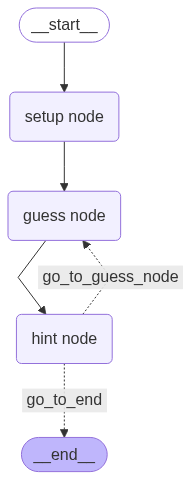

In [32]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [33]:
start_game = AgentState(player_name = "Jeff" , guesses = [], attempts = 0 , lower_bound = 1 , upper_bound = 20)
result = app.invoke(start_game)

Hello player Jeff!!. Lets see our graph can find the input number 13 or not!!
The guess number 1 is 19
Please guess a number less than 19
The guess number 2 is 17
Please guess a number less than 17
The guess number 3 is 15
Please guess a number less than 15
The guess number 4 is 11
Please guess a number greater than 11
The guess number 5 is 13
Please guess a number greater than 13
You guessed the number in Attempt : 6 and the Guess attempted : [19, 17, 15, 11, 13]
